# TO DO LIST APP

In [1]:
# Enable the Tkinter event loop integration for Jupyter
%gui tk

In [2]:
import tkinter as tk
from tkinter import simpledialog, messagebox

class ToDoApp:
    def __init__(self, root):
        self.root = root
        self.root.title("To-Do List App")
        self.tasks = []

        # Frame for the listbox and scrollbar
        self.frame = tk.Frame(self.root)
        self.frame.pack(pady=10)

        # Listbox to display tasks
        self.listbox = tk.Listbox(self.frame, width=50, height=15, selectmode=tk.SINGLE)
        self.listbox.pack(side=tk.LEFT, fill=tk.BOTH)

        # Scrollbar for the listbox
        self.scrollbar = tk.Scrollbar(self.frame)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        # Connecting the scrollbar to the listbox
        self.listbox.config(yscrollcommand=self.scrollbar.set)
        self.scrollbar.config(command=self.listbox.yview)

        # Entry widget for adding new tasks
        self.task_entry = tk.Entry(self.root, width=50)
        self.task_entry.pack(pady=10)

        # Button to add tasks
        self.add_task_button = tk.Button(self.root, text="Add Task", command=self.add_task)
        self.add_task_button.pack(pady=5)

        # Button to delete tasks
        self.delete_task_button = tk.Button(self.root, text="Delete Task", command=self.delete_task)
        self.delete_task_button.pack(pady=5)

        # Button to edit tasks
        self.edit_task_button = tk.Button(self.root, text="Edit Task", command=self.edit_task)
        self.edit_task_button.pack(pady=5)

        # Load tasks from a file
        self.load_tasks()

    def add_task(self):
        task = self.task_entry.get()
        if task != "":
            self.tasks.append(task)
            self.update_listbox()
            self.task_entry.delete(0, tk.END)
            self.save_tasks()
        else:
            messagebox.showwarning("Warning", "You must enter a task.")

    def delete_task(self):
        try:
            selected_task_index = self.listbox.curselection()[0]
            del self.tasks[selected_task_index]
            self.update_listbox()
            self.save_tasks()
        except IndexError:
            messagebox.showwarning("Warning", "You must select a task to delete.")

    def edit_task(self):
        try:
            selected_task_index = self.listbox.curselection()[0]
            new_task = simpledialog.askstring("Edit Task", "Edit the selected task:", initialvalue=self.tasks[selected_task_index])
            if new_task:
                self.tasks[selected_task_index] = new_task
                self.update_listbox()
                self.save_tasks()
        except IndexError:
            messagebox.showwarning("Warning", "You must select a task to edit.")

    def update_listbox(self):
        # Clear the current listbox
        self.listbox.delete(0, tk.END)
        # Add each task to the listbox
        for task in self.tasks:
            self.listbox.insert(tk.END, task)

    def load_tasks(self):
        try:
            with open("tasks.txt", "r") as file:
                tasks = file.readlines()
                self.tasks = [task.strip() for task in tasks]
                self.update_listbox()
        except FileNotFoundError:
            # If the file doesn't exist, no tasks to load
            pass

    def save_tasks(self):
        with open("tasks.txt", "w") as file:
            for task in self.tasks:
                file.write(task + "\n")

# Create a root window and run the app
root = tk.Tk()
app = ToDoApp(root)
root.mainloop()


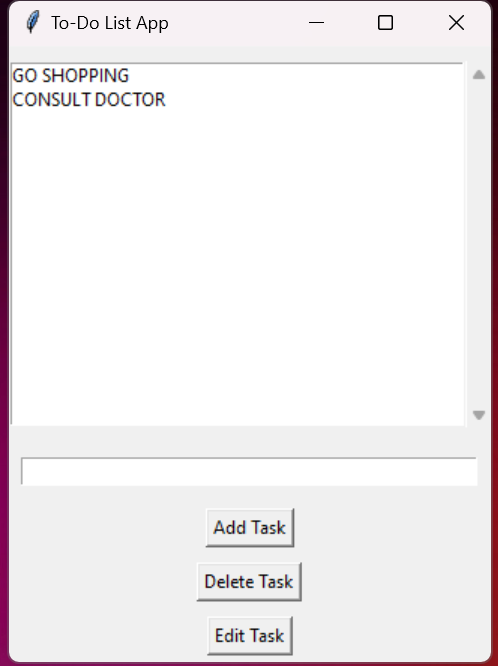

**EXPLANATION OF CODE:** 

Class Initialization (__init__):

Sets up the main window and creates widgets: listbox, scrollbar, task entry, and buttons for adding, deleting, and editing tasks.

The load_tasks function reads tasks from a file (tasks.txt) if it exists.
Adding Tasks (add_task):

Adds a new task from the entry widget to the list and updates the listbox.
Deleting Tasks (delete_task):

Removes the selected task from the list and updates the listbox.
Editing Tasks (edit_task):

Allows editing of a selected task using a simple dialog box.
Updating the Listbox (update_listbox):

Clears the listbox and inserts the updated task list.
Saving and Loading Tasks:

The tasks are saved to and loaded from a file named tasks.txt.